## Importing all the EDA Librarires

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

# Reading the Dataset

In [4]:
df = pd.read_csv('tradedata_clean.csv', encoding='latin1')

print(df)

     period reporterDesc  partnerDesc  cmdCode         qty     altQty  \
0      2017        Ghana        World     7108  197809.923       0.00   
1      2017        Ghana    Australia     7108      28.140      28.14   
2      2017        Ghana      Belgium     7108      20.740      20.74   
3      2017        Ghana       Brazil     7108       0.590       0.59   
4      2017        Ghana       Canada     7108       0.460       0.46   
..      ...          ...          ...      ...         ...        ...   
363    2023        Ghana      Türkiye   710813   20990.460   20990.46   
364    2023      Nigeria        World     7108    3217.799       0.00   
365    2023      Nigeria  Switzerland     7108    3217.799       0.00   
366    2023      Nigeria        World   710811    3217.799  929961.80   
367    2023      Nigeria  Switzerland   710811    3217.799  929961.80   

       netWgt   Merge_qty       primaryValue  
0         NaN  197809.923  $5,858,280,934.89  
1      28.140      28.140    

In [5]:
df.head()

,period,reporterDesc,partnerDesc,cmdCode,qty,altQty,netWgt,Merge_qty,primaryValue
0,2017,Ghana,World,7108,197809.923,0.00,NaN,197809.923,"$5,858,280,934.89"
1,2017,Ghana,Australia,7108,28.140,28.14,28.14,28.140,"$1,103,009.85"
2,2017,Ghana,Belgium,7108,20.740,20.74,20.74,20.740,"$927,456.05"
3,2017,Ghana,Brazil,7108,0.590,0.59,0.59,0.590,"$4,926.13"
4,2017,Ghana,Canada,7108,0.460,0.46,0.46,0.460,"$19,401.24"


# Filling the Missing Values for netwt

In [7]:
df = df.fillna(0)

print(df)

     period reporterDesc  partnerDesc  cmdCode         qty     altQty  \
0      2017        Ghana        World     7108  197809.923       0.00   
1      2017        Ghana    Australia     7108      28.140      28.14   
2      2017        Ghana      Belgium     7108      20.740      20.74   
3      2017        Ghana       Brazil     7108       0.590       0.59   
4      2017        Ghana       Canada     7108       0.460       0.46   
..      ...          ...          ...      ...         ...        ...   
363    2023        Ghana      Türkiye   710813   20990.460   20990.46   
364    2023      Nigeria        World     7108    3217.799       0.00   
365    2023      Nigeria  Switzerland     7108    3217.799       0.00   
366    2023      Nigeria        World   710811    3217.799  929961.80   
367    2023      Nigeria  Switzerland   710811    3217.799  929961.80   

       netWgt   Merge_qty       primaryValue  
0       0.000  197809.923  $5,858,280,934.89  
1      28.140      28.140    

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   period        368 non-null    int64  
 1   reporterDesc  368 non-null    object 
 2   partnerDesc   368 non-null    object 
 3   cmdCode       368 non-null    int64  
 4   qty           368 non-null    float64
 5   altQty        368 non-null    float64
 6   netWgt        368 non-null    float64
 7   Merge_qty     368 non-null    float64
 8   primaryValue  368 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 26.0+ KB


# Updating the Data type of various columns

In [10]:
df['cmdCode'] = df['cmdCode'].astype('object')
df['primaryValue'] = df['primaryValue'].replace('[\$,]', '', regex=True).astype('float64')

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ashfa\AppData\Local\Temp\ipykernel_13560\4124176460.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['primaryValue'] = df['primaryValue'].replace('[\$,]', '', regex=True).astype('float64')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   period        368 non-null    int64  
 1   reporterDesc  368 non-null    object 
 2   partnerDesc   368 non-null    object 
 3   cmdCode       368 non-null    object 
 4   qty           368 non-null    float64
 5   altQty        368 non-null    float64
 6   netWgt        368 non-null    float64
 7   Merge_qty     368 non-null    float64
 8   primaryValue  368 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 26.0+ KB


# Updated the PrimaryValue Column Name to PrimaryValuesDollars

In [13]:
df.rename(columns={'primaryValue':'primaryValuesdollars'}, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   period                368 non-null    int64  
 1   reporterDesc          368 non-null    object 
 2   partnerDesc           368 non-null    object 
 3   cmdCode               368 non-null    object 
 4   qty                   368 non-null    float64
 5   altQty                368 non-null    float64
 6   netWgt                368 non-null    float64
 7   Merge_qty             368 non-null    float64
 8   primaryValuesdollars  368 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 26.0+ KB


# GOLD EXPORT PERFORMANCE OVER TIME (GHANA)

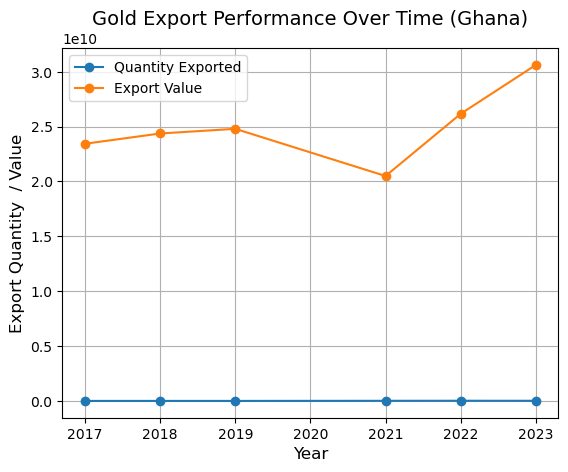

In [16]:
ghana_data= df[df['reporterDesc'] == 'Ghana']

performance_over_time = ghana_data.groupby('period')[['qty', 'primaryValuesdollars']].sum()

plt.figure(figure=(10,6))
plt.plot(performance_over_time.index, performance_over_time['qty'], marker='o', label='Quantity Exported')
plt.plot(performance_over_time.index, performance_over_time['primaryValuesdollars'], marker='o', label= 'Export Value')

plt.title('Gold Export Performance Over Time (Ghana)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Export Quantity  / Value', fontsize=12)
plt.legend()
plt.grid(True)

plt.show()

# GOLD PERFORMANCE OVER TIME (Nigeria)

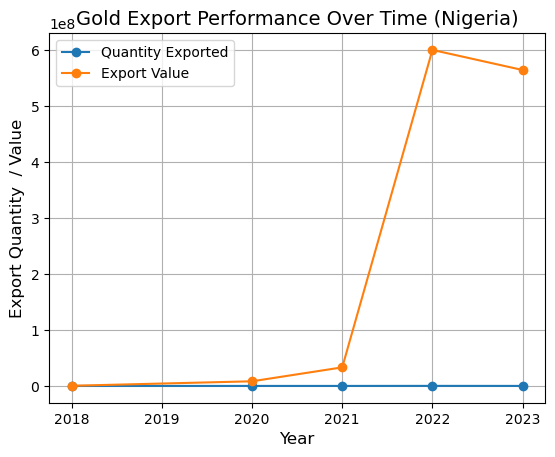

In [18]:
ghana_data= df[df['reporterDesc'] == 'Nigeria']

performance_over_time = ghana_data.groupby('period')[['qty', 'primaryValuesdollars']].sum()

plt.figure(figure=(10,6))
plt.plot(performance_over_time.index, performance_over_time['qty'], marker='o', label='Quantity Exported')
plt.plot(performance_over_time.index, performance_over_time['primaryValuesdollars'], marker='o', label= 'Export Value')

plt.title('Gold Export Performance Over Time (Nigeria)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Export Quantity  / Value', fontsize=12)
plt.legend()
plt.grid(True)

plt.show()

# Top PARTNER COUNTRIES FOR GOLD EXPORTS (Ghana)

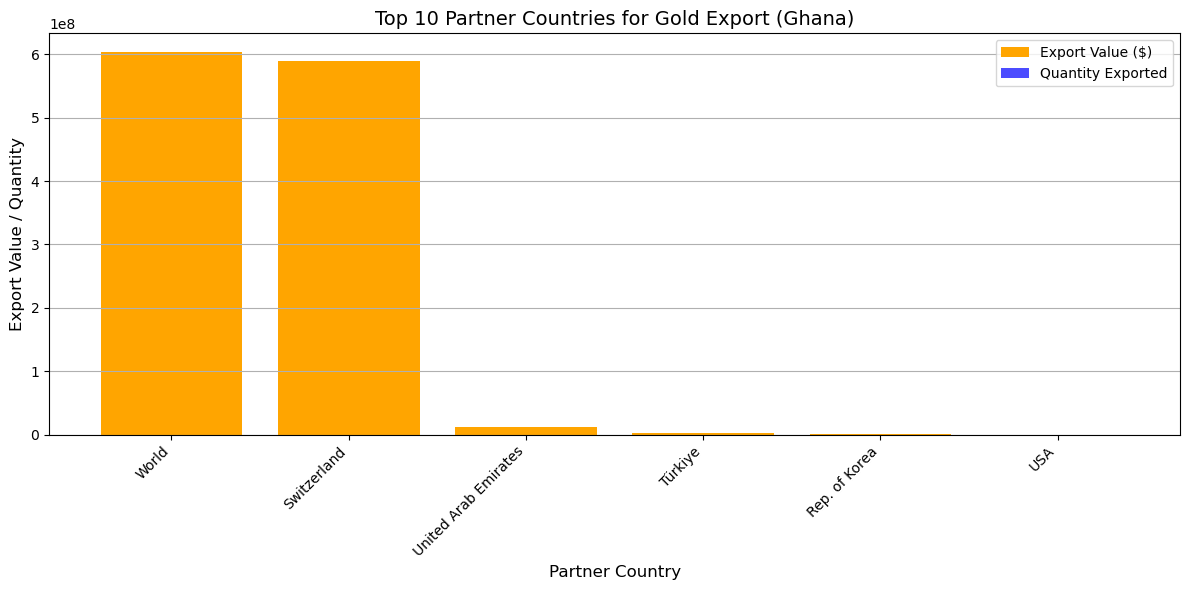

In [20]:
# Group by partnerDesc and calculate the total quantity and value
top_partners = ghana_data.groupby('partnerDesc')[['qty', 'primaryValuesdollars']].sum()

# Sort by primaryValue (or qty) to get the top 10 partners
top_partners = top_partners.sort_values('primaryValuesdollars', ascending=False).head(10)

# Plot the top partners
plt.figure(figsize=(12, 6))
plt.bar(top_partners.index, top_partners['primaryValuesdollars'], color='orange', label='Export Value ($)')
plt.bar(top_partners.index, top_partners['qty'], color='blue', alpha=0.7, label='Quantity Exported')

plt.title('Top 10 Partner Countries for Gold Export (Ghana)', fontsize=14)
plt.xlabel('Partner Country', fontsize=12)
plt.ylabel('Export Value / Quantity', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()


# Top PARTNER COUNTRIES FOR GOLD EXPORTS (Nigeria)

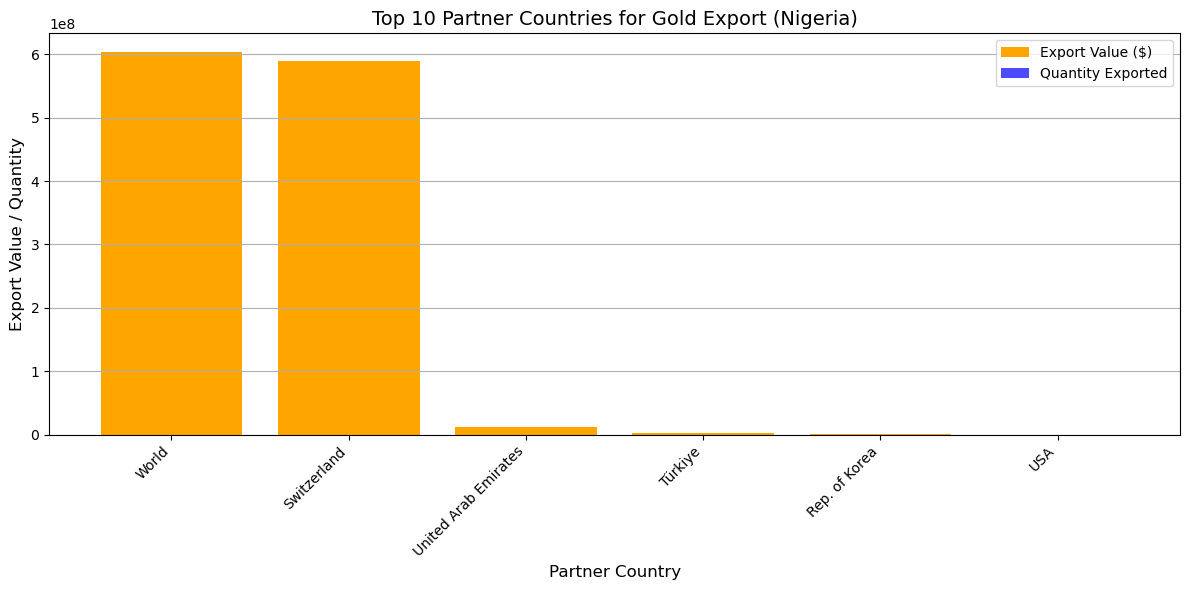

In [22]:
# Filter data for Nigeria
nigeria_data = df[df['reporterDesc'] == 'Nigeria']

# Group by partnerDesc and calculate the total quantity and value
top_partners_nigeria = nigeria_data.groupby('partnerDesc')[['qty', 'primaryValuesdollars']].sum()

# Sort by primaryValue (or qty) to get the top 10 partners
top_partners_nigeria = top_partners_nigeria.sort_values('primaryValuesdollars', ascending=False).head(10)


plt.figure(figsize=(12, 6))
plt.bar(top_partners_nigeria.index, top_partners_nigeria['primaryValuesdollars'], color='orange', label='Export Value ($)')
plt.bar(top_partners_nigeria.index, top_partners_nigeria['qty'], color='blue', alpha=0.7, label='Quantity Exported')


plt.title('Top 10 Partner Countries for Gold Export (Nigeria)', fontsize=14)
plt.xlabel('Partner Country', fontsize=12)
plt.ylabel('Export Value / Quantity', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y')


plt.tight_layout()
plt.show()

# Which trade partners contribute the most to the primary value for specific commodities?

In [24]:
#Grouping the data
partner_contributions = df.groupby(['cmdCode', 'partnerDesc'], as_index=False)['primaryValuesdollars'].sum()

#Sorting the Partners 
sorted_partners = partner_contributions.sort_values(by=['cmdCode', 'primaryValuesdollars'], ascending=[True, False])

#assigning to vaiable top_partners_per_commodity
top_partners_per_commodity = sorted_partners.groupby('cmdCode').head(5)

print(top_partners_per_commodity)

    cmdCode           partnerDesc  primaryValuesdollars
47     7108                 World          3.777079e+10
40     7108           Switzerland          1.455092e+10
16     7108                 India          1.044393e+10
38     7108          South Africa          7.505302e+09
44     7108  United Arab Emirates          4.111325e+09
51   710811                 World          2.968170e+08
49   710811           Switzerland          2.944401e+08
50   710811  United Arab Emirates          1.357112e+06
48   710811                 India          1.019740e+06
71   710812                 World          1.227368e+09
56   710812                 India          9.960749e+08
69   710812  United Arab Emirates          1.837989e+08
53   710812  China, Hong Kong SAR          2.730319e+07
61   710812         Rep. of Korea          1.302695e+07
116  710813                 World          3.624660e+10
109  710813           Switzerland          1.425648e+10
87   710813                 India          9.446

### Bar Plot of the trade partners contribution of specific Gold Commodities!

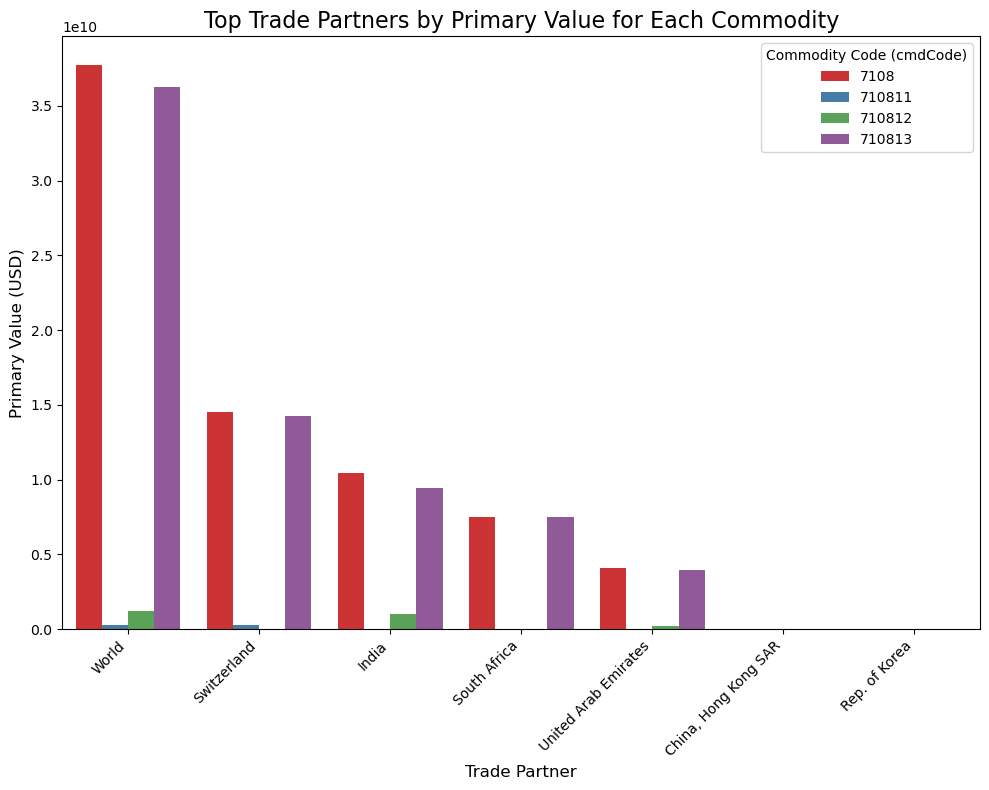

In [26]:
plt.figure(figsize=(10, 8))
sns.barplot(data=top_partners_per_commodity,x='partnerDesc',y='primaryValuesdollars',hue='cmdCode',palette='Set1')
plt.title('Top Trade Partners by Primary Value for Each Commodity', fontsize=16)
plt.xlabel('Trade Partner', fontsize=12)
plt.ylabel('Primary Value (USD)', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.legend(title='Commodity Code (cmdCode)', fontsize=10)
plt.tight_layout()
plt.show()

# Comparison of Export Quantities and Values

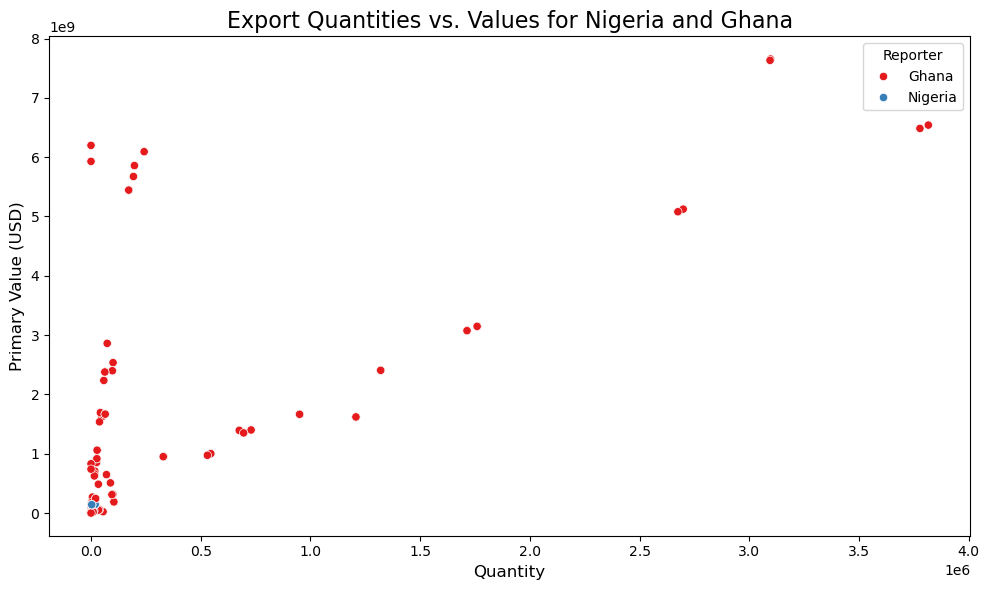

In [28]:
plt.figure(figsize = (10,6))
sns.scatterplot(data=df, x='qty', y='primaryValuesdollars', hue='reporterDesc', palette='Set1')
plt.title('Export Quantities vs. Values for Nigeria and Ghana', fontsize=16)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Primary Value (USD)', fontsize=12)
plt.legend(title='Reporter', fontsize=10)
plt.tight_layout()
plt.show()

# Which commodities (cmdCode) have the highest total trade value globally?

C:\Users\ashfa\AppData\Local\Temp\ipykernel_13560\3784761416.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= commodities_global,x='cmdCode', y='primaryValuesdollars',palette='Set2')


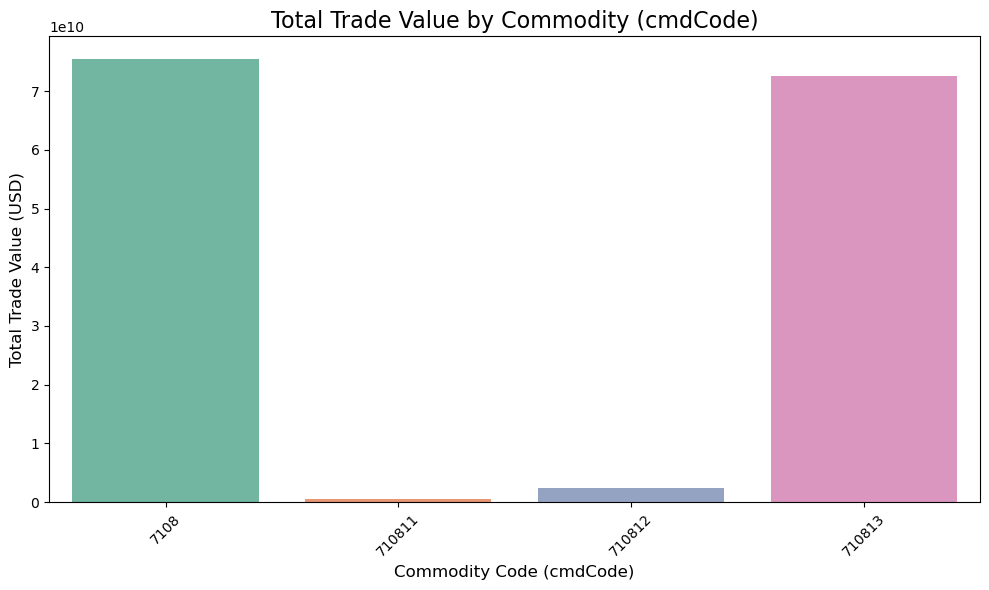

In [30]:
commodities_global = df.groupby('cmdCode', as_index=False)['primaryValuesdollars'].sum()

#barplot
plt.figure(figsize = (10,6))
sns.barplot(data= commodities_global,x='cmdCode', y='primaryValuesdollars',palette='Set2')
plt.title('Total Trade Value by Commodity (cmdCode)', fontsize=16)
plt.xlabel('Commodity Code (cmdCode)', fontsize=12)
plt.ylabel('Total Trade Value (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmap comparison of Partner

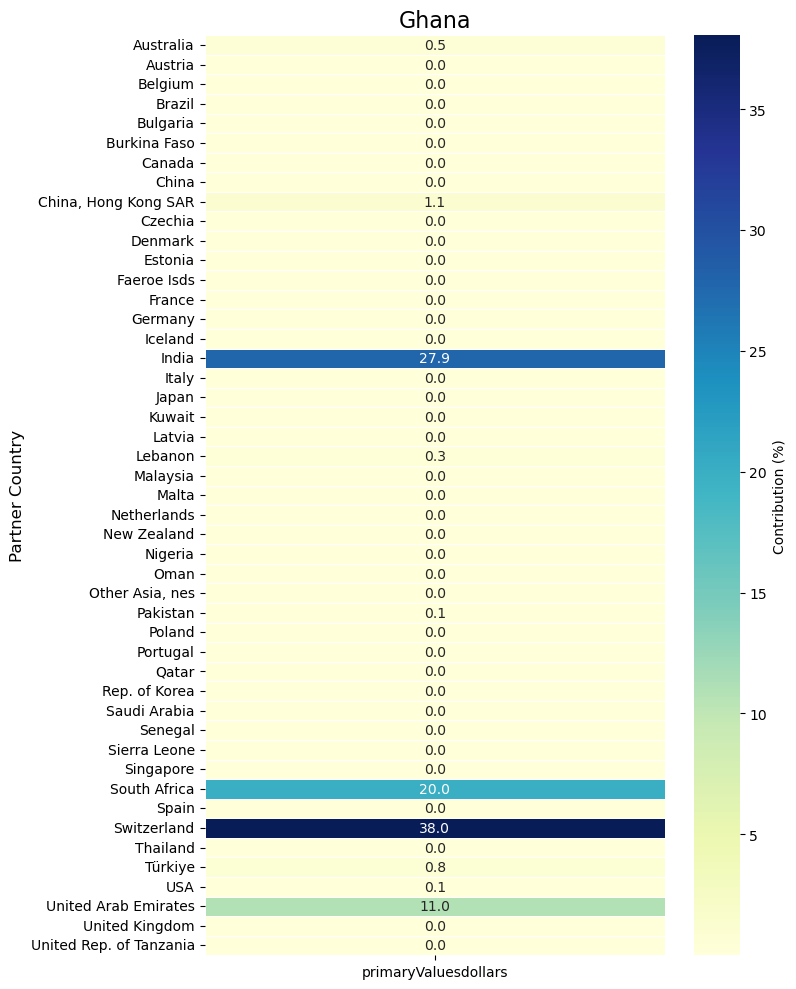

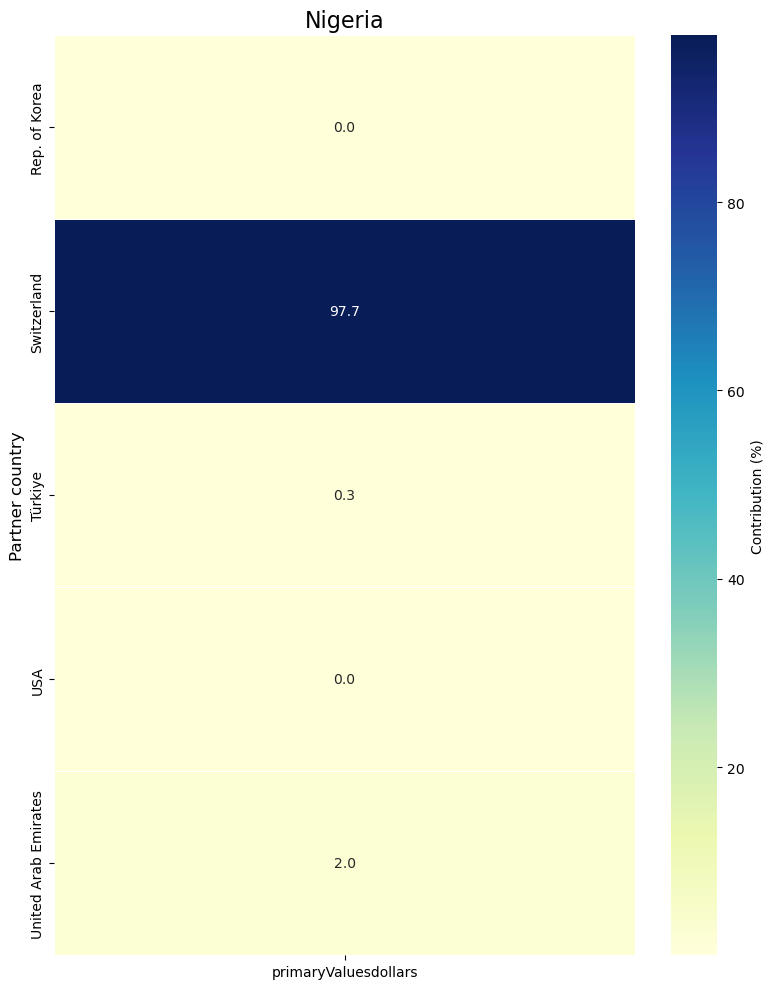

In [32]:
filtered_data = df[df['partnerDesc'] != 'World']

ghana_contributions = (
    filtered_data[filtered_data['reporterDesc'] == 'Ghana']
    .groupby(['partnerDesc'])[['primaryValuesdollars']]
    .sum()
    .reset_index()
)

nigeria_contributions = (
    filtered_data[filtered_data['reporterDesc'] == 'Nigeria']
    .groupby(['partnerDesc'])[['primaryValuesdollars']]
    .sum()
    .reset_index()
)

ghana_pivot = ghana_contributions.pivot_table(index='partnerDesc', values='primaryValuesdollars', aggfunc='sum')
ghana_pivot_percentage = (ghana_pivot / ghana_pivot.sum()) * 100

nigeria_pivot = nigeria_contributions.pivot_table(index='partnerDesc', values='primaryValuesdollars', aggfunc='sum')
nigeria_pivot_percentage = (nigeria_pivot / nigeria_pivot.sum()) * 100

# Heatmap for Ghana
plt.figure(figsize=(8, 10))
sns.heatmap(
    ghana_pivot_percentage,
    cmap="YlGnBu",
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cbar_kws={'label': 'Contribution (%)'}
)
plt.title('Ghana', fontsize=16)
plt.xlabel('')
plt.ylabel('Partner Country', fontsize=12)
plt.tight_layout()
plt.show()

# Heatmap for Nigeria
plt.figure(figsize=(8, 10))
sns.heatmap(
    nigeria_pivot_percentage,
    cmap="YlGnBu",
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cbar_kws={'label': 'Contribution (%)'}
)
plt.title('Nigeria', fontsize=16)
plt.xlabel('')
plt.ylabel('Partner country', fontsize=12)
plt.tight_layout()
plt.show()

# Trade Volume: BRICS vs Non-BRICS Nations

C:\Users\ashfa\AppData\Local\Temp\ipykernel_13560\590273026.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_totals_qty, x='Category', y='Total Quantity', palette=['blue', 'green'])


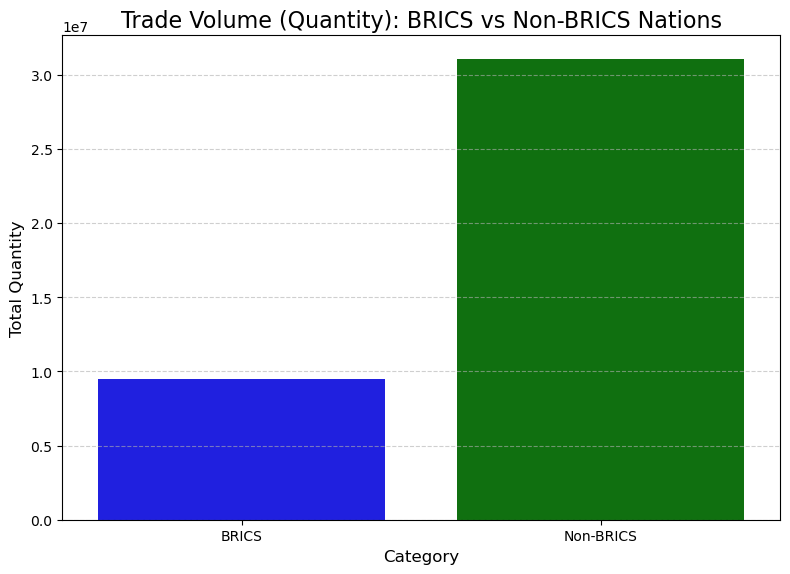

In [33]:
# List of BRICS nations
brics = ["Brazil", "Russia", "India", "China", "South Africa"]

# Categorize based on the `partnerDesc` column
df['category'] = df['partnerDesc'].apply(lambda x: 'BRICS' if x in brics else 'Non-BRICS')

# Group data by category and sum the quantities (`qty`)
category_totals_qty = df.groupby('category')['Merge_qty'].sum().reset_index()

# Rename columns for clarity
category_totals_qty.columns = ['Category', 'Total Quantity']

# Seaborn barplot
plt.figure(figsize=(8, 6))
sns.barplot(data=category_totals_qty, x='Category', y='Total Quantity', palette=['blue', 'green'])
plt.title('Trade Volume (Quantity): BRICS vs Non-BRICS Nations', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Quantity', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

# Trade Volume Over Time: BRICS vs Non-BRICS

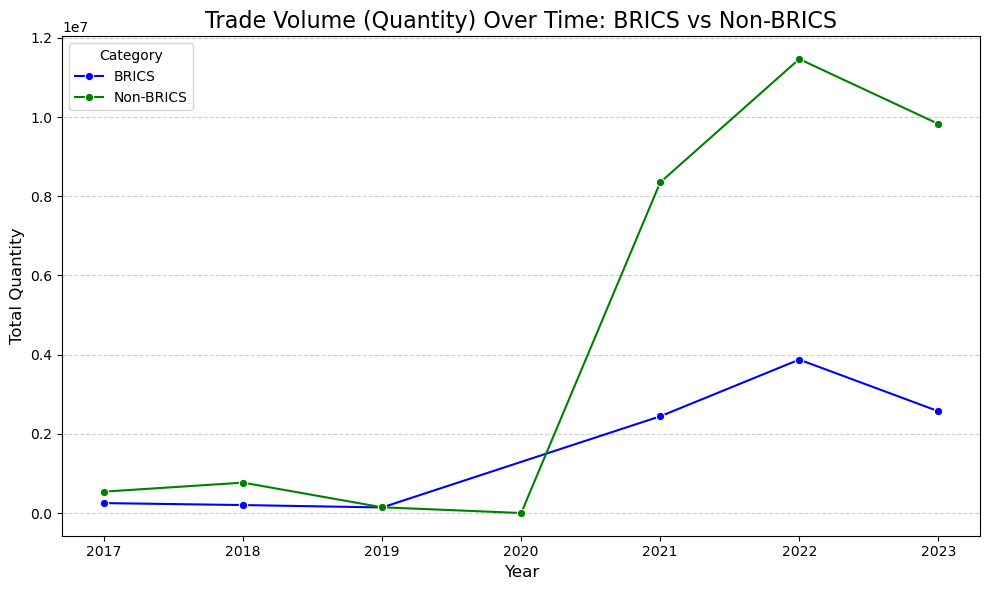

In [88]:
# Group data by `refyear` and `category` and sum the trade quantities (`Merge_qty`)
time_based_totals = df.groupby(['period', 'category'])['Merge_qty'].sum().reset_index()

# Rename columns for clarity
time_based_totals.columns = ['Year', 'Category', 'Total Quantity']

# Seaborn lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=time_based_totals, x='Year', y='Total Quantity', hue='Category', marker='o', palette=['blue', 'green'])
plt.title('Trade Volume (Quantity) Over Time: BRICS vs Non-BRICS', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Quantity', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Category', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

# Linear Regression Model with Multiple Features

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
X = df[['qty', 'netWgt', 'cmdCode']]
y = df['primaryValuesdollars']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = model.predict(X_test)

In [40]:
mse = mean_squared_error(y_test, y_pred)

In [41]:
r2 = r2_score(y_test, y_pred)

In [42]:
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Mean Squared Error (MSE): 8.67497492382377e+17
R-squared (R2): 0.4059865682584577
Model Coefficients: [9.79417226e+02 2.46164458e+04 4.74884636e+00]
Model Intercept: 51714097.50520581


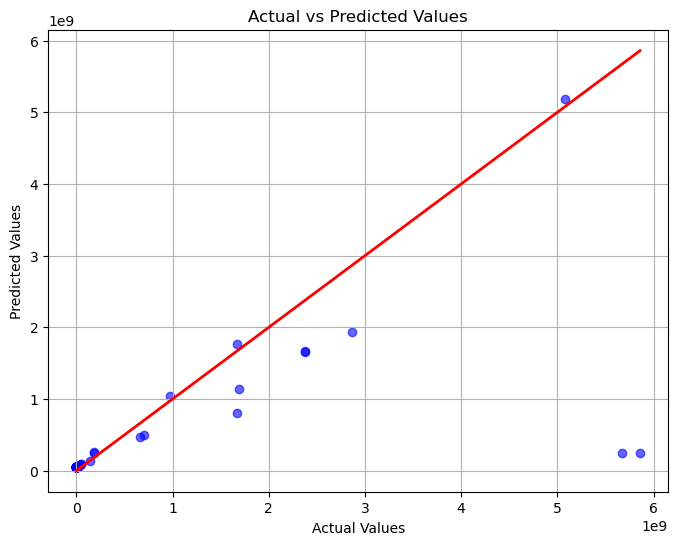

In [43]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

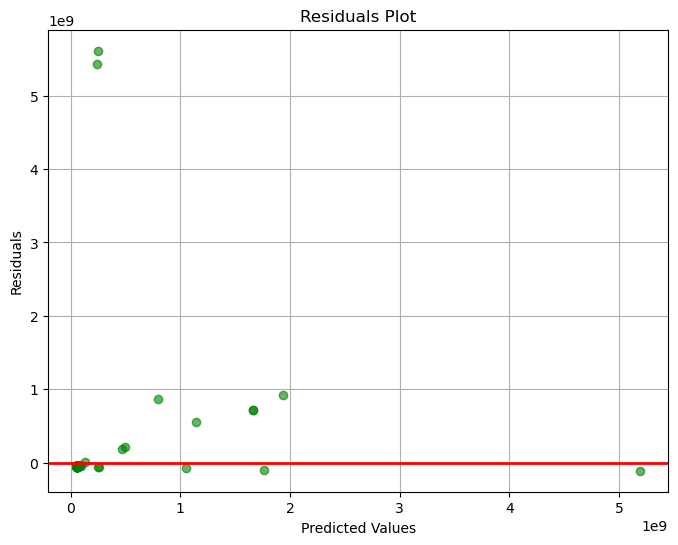

In [44]:
# Residuals plot (errors)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linewidth=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Future Prediction using FBProphet

In [46]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [47]:
from prophet import Prophet

In [48]:
# Aggregate data to get yearly totals
prophet_data = df.groupby('period')['primaryValuesdollars'].sum().reset_index()

# Rename columns for Prophet
prophet_data.rename(columns={'period': 'ds', 'primaryValuesdollars': 'y'}, inplace=True)

# Convert 'ds' to datetime (assuming 'period' is year-based)
prophet_data['ds'] = pd.to_datetime(prophet_data['ds'], format='%Y')

print(prophet_data.head())

          ds             y
0 2017-01-01  2.343312e+10
1 2018-01-01  2.437054e+10
2 2019-01-01  2.479546e+10
3 2020-01-01  8.264874e+06
4 2021-01-01  2.052894e+10


In [49]:
#Fit and Forecast Using Prophet

# Instantiate the Prophet model
model = Prophet()

# Fit the model
model.fit(prophet_data)

# Create a dataframe for future dates (next 5 years)
future = model.make_future_dataframe(periods=5, freq='Y')

# Forecast
forecast = model.predict(future)

11:25:26 - cmdstanpy - INFO - Chain [1] start processing
11:25:26 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ashfa\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


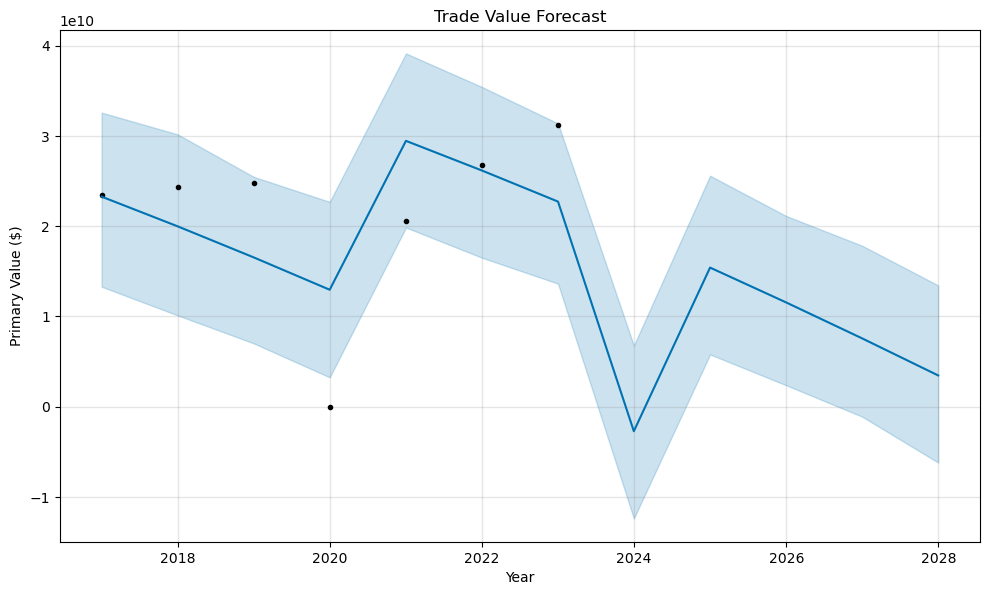

In [50]:
model.plot(forecast)
plt.title("Trade Value Forecast")
plt.xlabel("Year")
plt.ylabel("Primary Value ($)")
plt.show()

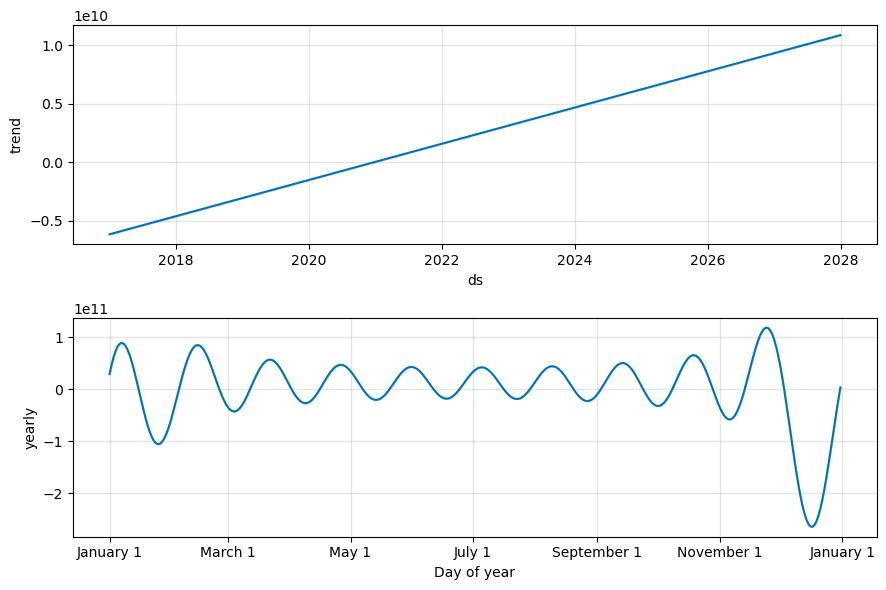

In [51]:
model.plot_components(forecast)
plt.show()